[-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7] [-6.75, -4.75, -2.75, -0.75, 1.25, 3.25, 5.25, 7.25, 9.25, 11.25, 13.25, 15.25]
Accuracy= 85.71428571428571%


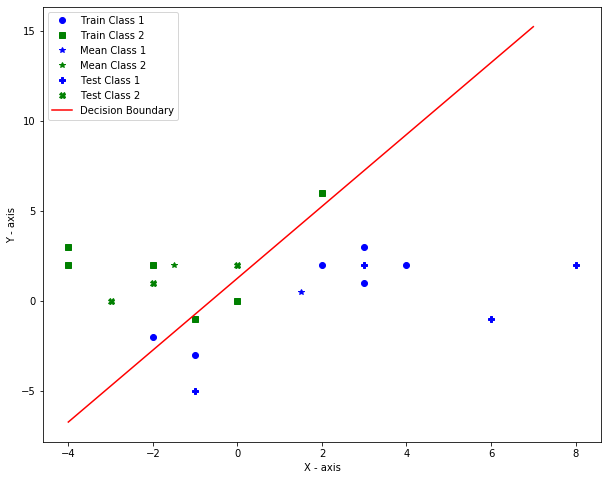

In [1]:
import matplotlib.pyplot as pit

#1. plotting train data 
#train_data
trx1=[]
try1=[]
trx2=[]
try2=[]
with open('train.txt','r') as f:
    for line in f:
        x,y,c = line.split(" ")
        if(int(c) ==1):
            trx1.append(int(x))
            try1.append(int(y))
        else:
            trx2.append(int(x))
            try2.append(int(y))
            
            
fig_1 = pit.figure(1, figsize=(10,8))
pit.plot(trx1, try1,'ob', label='Train Class 1') 
pit.plot(trx2,try2,'sg', label='Train Class 2') 
pit.xlabel('X - axis')
pit.ylabel('Y - axis')
pit.legend()


#2. classifying test data and plotting test data and mean value

meanX1=sum(trx1)/len(trx1)
meanY1=sum(try1)/len(try1)
meanX2=sum(trx2)/len(trx2)
meanY2=sum(try2)/len(try2)

#plotting mean of train data 
pit.plot(meanX1, meanY1,'*b', label='Mean Class 1')
pit.plot(meanX2, meanY2,'*g', label='Mean Class 2') 
pit.legend()


def g_x(x,y,meanX,meanY):
    return (meanX*x + meanY*y) - (0.5*(meanX*meanX +meanY*meanY))

#test data
testX=[]
testY=[]
testC=[]

with open('test.txt','r') as f:
    for line in f:
        x,y,c = line.split(" ") 
        testX.append(int(x))
        testY.append(int(y))
        testC.append(int(c))

teX1=[]
teY1=[]
teX2=[]
teY2=[]
count=0
res= [-1]*len(testC)

for i in range(len(testX)):
    g1_x = g_x(testX[i],testY[i],meanX1,meanY1)
    g2_x = g_x(testX[i],testY[i],meanX2,meanY2)
    
    if g1_x > g2_x:
        res[i] = 1 #result class for test data
        teX1.append(testX[i])
        teY1.append(testY[i])     
    else:
        res[i] = 2
        teX2.append(testX[i])
        teY2.append(testY[i])
        
    if res[i] ==testC[i]:
        count=count+1
    
#plotting test data according to our result
pit.plot(teX1, teY1,'Pb', label='Test Class 1') 
pit.plot(teX2,teY2,'Xg', label='Test Class 2') 
pit.legend()

#3. decision boundary
def db(x):
    y = ((meanX2 - meanX1) * x + 0.5* (meanX1*meanX1 + meanY1* meanY1 
                 - meanX2*meanX2 - meanY2*meanY2)) /(meanY1 - meanY2)
    return y

x=[]
y=[]
for i in range(-4,8):
    x.append(i)
    y.append(db(i))

print(x,y)

#plotting decision boundary
pit.plot(x, y,'r',label='Decision Boundary') 
pit.legend()

#4.accuracy
accuracy = (count/len(testC))*100
print("Accuracy= " + str(accuracy) + "%")
